In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

### Convert keras to TF-Lite

In [15]:
# Specify the path to the model file
model_path = "xception_v4_46_0.889.keras"

# Load the model
model = load_model(model_path)

### Using Keras for the prediction

In [16]:
import numpy as np
import tensorflow.lite as tflite
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

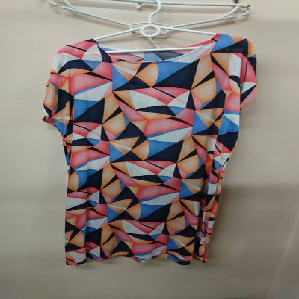

In [17]:
load_img('06a00c0f-5f9a-410d-a7da-3881a9df3a71.jpg', target_size=(299, 299))

In [18]:
img = load_img('06a00c0f-5f9a-410d-a7da-3881a9df3a71.jpg', target_size=(299, 299))

x = np.array(img)
X = np.array([x])

X = preprocess_input(X)

preds = model.predict(X)


classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

dict(zip(classes, preds[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


{'dress': 5.5989666,
 'hat': -4.693817,
 'longsleeve': -3.1363406,
 'outwear': -2.0544784,
 'pants': -1.6800984,
 'shirt': -5.3006654,
 'shoes': -2.9639835,
 'shorts': -3.6652205,
 'skirt': -3.9545891,
 't-shirt': 2.602691}

### Using Tensorflowlite for the prediction

In [19]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("clothing-model.tflite", "wb") as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\oluwa\AppData\Local\Temp\tmpbdxx0pt3\assets


INFO:tensorflow:Assets written to: C:\Users\oluwa\AppData\Local\Temp\tmpbdxx0pt3\assets


Saved artifact at 'C:\Users\oluwa\AppData\Local\Temp\tmpbdxx0pt3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2627776382160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2627776383120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2627776383312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2627776382928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2627776381200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2627776383696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2627776385040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2627776385232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2627776384848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2627776384080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  262

In [20]:
interpreter = tflite.Interpreter(model_path="clothing-model.tflite")
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_tensor = interpreter.get_output_details()[0]['index']


interpreter.set_tensor(input_index, X)
interpreter.invoke()

preds = interpreter.get_tensor(output_tensor)

In [21]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]


dict(zip(preds[0], classes))

{5.5989666: 'dress',
 -4.6938167: 'hat',
 -3.1363385: 'longsleeve',
 -2.0544868: 'outwear',
 -1.6800935: 'pants',
 -5.300661: 'shirt',
 -2.9639838: 'shoes',
 -3.6652148: 'shorts',
 -3.9545856: 'skirt',
 2.6026874: 't-shirt'}

### Removing tensorflow dependency

In [22]:
from PIL import Image

In [24]:
img = Image.open('06a00c0f-5f9a-410d-a7da-3881a9df3a71.jpg').resize((299, 299), Image.NEAREST)

In [25]:
def process_input(x):
    x /= 127.5
    x -= 1.
    return x

In [26]:
x = np.array(img, dtype='float32')
X = np.array([x])

X = process_input(X)

In [27]:
interpreter = tflite.Interpreter(model_path="clothing-model.tflite")
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_tensor = interpreter.get_output_details()[0]['index']


interpreter.set_tensor(input_index, X)
interpreter.invoke()

preds = interpreter.get_tensor(output_tensor)

In [28]:
dict(zip(preds[0], classes))

{5.5989666: 'dress',
 -4.6938167: 'hat',
 -3.1363385: 'longsleeve',
 -2.0544868: 'outwear',
 -1.6800935: 'pants',
 -5.300661: 'shirt',
 -2.9639838: 'shoes',
 -3.6652148: 'shorts',
 -3.9545856: 'skirt',
 2.6026874: 't-shirt'}

### Simpler way of doing things

In [29]:
from keras_image_helper import create_preprocessor

In [30]:
interpreter = tflite.Interpreter(model_path="clothing-model.tflite")
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_tensor = interpreter.get_output_details()[0]['index']

In [31]:
preprocessor = create_preprocessor("xception", target_size=(299, 299))
new = preprocessor.from_path('06a00c0f-5f9a-410d-a7da-3881a9df3a71.jpg')

In [32]:
interpreter.set_tensor(input_index, new)
interpreter.invoke()

new_preds = interpreter.get_tensor(output_tensor)

In [33]:
dict(zip(new_preds[0], classes))

{5.5989666: 'dress',
 -4.6938167: 'hat',
 -3.1363385: 'longsleeve',
 -2.0544868: 'outwear',
 -1.6800935: 'pants',
 -5.300661: 'shirt',
 -2.9639838: 'shoes',
 -3.6652148: 'shorts',
 -3.9545856: 'skirt',
 2.6026874: 't-shirt'}

We are supposed to install tensorflowlite but unfortunately it does not work with python 3.12 so i would just comment the code down here

In [27]:
#!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime
# import tflite_runtime.interpreter as tflite
# instead of import tensorflow.lite as tflite

In [38]:
! python3 -m pip install ai-edge-litert

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement ai-edge-litert (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\oluwa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for ai-edge-litert


In [ ]:
# Load the LiteRT model and allocate tensors.
from ai_edge_litert.interpreter import Interpreter

interpreter = Interpreter(model_content="clothing-model.tflite")
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_tensor = interpreter.get_output_details()[0]['index']

preprocessor = create_preprocessor("xception", target_size=(299, 299))
new = preprocessor.from_path('06a00c0f-5f9a-410d-a7da-3881a9df3a71.jpg')

interpreter.set_tensor(input_index, new)
interpreter.invoke()

new_preds = interpreter.get_tensor(output_tensor)

In [ ]:
dict(zip(new_preds[0], classes))